In [1]:
#!/usr/bin/python
# -*- coding:utf-8 -*-
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime
from collections import Counter
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.linear_model import RANSACRegressor
import scipy.stats
from matplotlib import style
from datetime import timedelta

Net_df = pd.read_csv('Data/Net_df_1223_total_region.csv')

Net_df['inf_time'] = pd.to_datetime(Net_df['inf_time'], format="%Y-%m-%d", errors='ignore')
Net_df['inf_time'] = Net_df['inf_time'].dt.date
Net_df['Primary_id'] = Net_df['Primary_id'].astype(int)

# Serial Interval

Number of  Data : 873
Number of  Filtering Data : 33
Number of  Data : 560
Number of  Filtering Data : 0
Number of  Data : 1882
Number of  Filtering Data : 21
Number of  Data : 16301
Number of  Filtering Data : 399
Number of  Data : 13443
Number of  Filtering Data : 117
Number of  Data : 8682
Number of  Filtering Data : 51


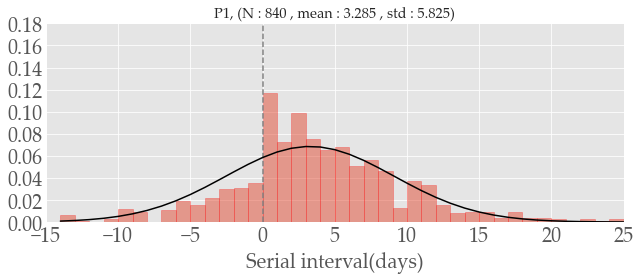

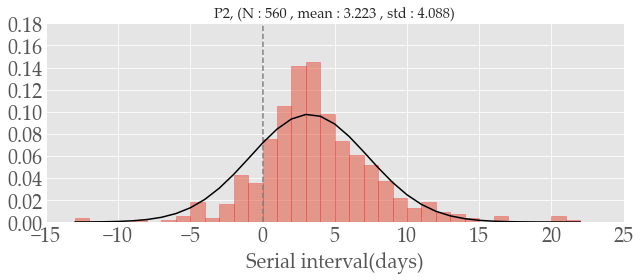

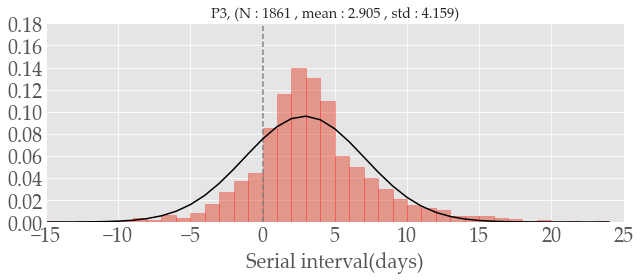

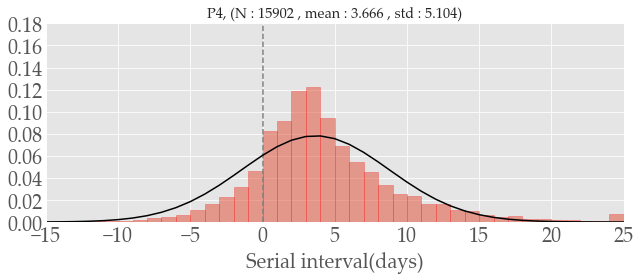

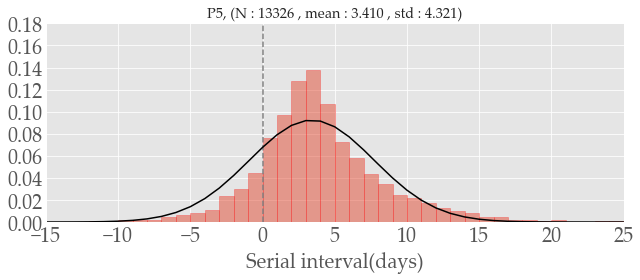

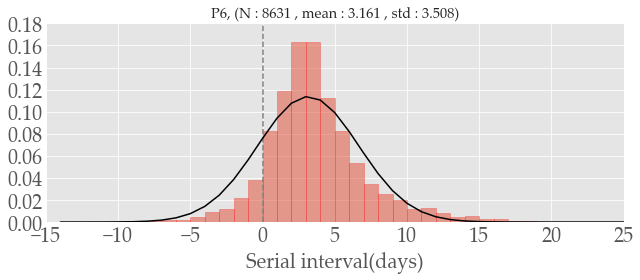

In [130]:
plt.rcParams["font.family"] = "Palatino Linotype"
## Serial interval
## Revise to 선행확진자 증상일 - 후행확진자 증상일
from scipy import stats
SW_p = []
target_date = ['2020-01-19', '2020-04-30', '2020-07-15', '2020-10-13', '2021-02-26', '2021-07-12','2021-09-16']
frac = [0.1,0.2,0.1,0.01,0.01,0.01]
# target_date = ['2020-01-19', '2021-09-16']
# frac = [1]*6
style.use('ggplot')
S_interval = []
k_ = [20, 25, 30, 35, 40, 45, 50, 60]
for i in range(len(target_date)):
    target_date[i] = datetime.strptime(target_date[i], "%Y-%m-%d").date()
    
# for sw in range(len(k_)):# 정규성 검정 for
for i in range(len(target_date) - 1):
    Net_df_1 = Net_df.loc[:][(Net_df.loc[:,'inf_time'] >= target_date[i]) & (Net_df.loc[:,'inf_time'] < target_date[i + 1])]

    for i2 in Net_df_1.index:
        if len(Net_df_1.loc[i2, 'Onset_date']) != 1:
            Net_df_1.loc[i2, 'Onset_date'] = datetime.strptime(Net_df_1.loc[i2, 'Onset_date'][0:10], "%Y-%m-%d").date()

    Net_df_Onset_0 = Net_df_1.loc[:][Net_df_1.loc[:, 'Onset_date'] == '0'].index
    Net_df2 = Net_df_1.drop(Net_df_Onset_0)
    


    Net_df_2 = Net_df_1.sample(frac=frac[i]).copy()



    S_interval.append([])
    for i2 in Net_df2.index:
        # df_2는 선행확진자의 증상일
        df_2 = Net_df2.loc[:,'Onset_date'][Net_df2.loc[:,'Primary_id'] == Net_df2.loc[i2,'id']] 
        
        for j2 in df_2.index:
            diff_days = df_2[j2] - Net_df2.loc[i2,'Onset_date']
            # print(j)
            # print(diff_days)
            S_interval[i].append(diff_days.days)
            
# for i in range(5):  
    data = S_interval[i].copy()
    ct = 0
    for i2 in range(len(S_interval[i])):
        if (S_interval[i][i2] > 25) | (S_interval[i][i2] <-15):
        # if (S_interval[i][i2] > 16) | (S_interval[i][i2] <-10):
            data.remove(S_interval[i][i2])
            ct += 1
    print('Number of  Data : ' + str(len(S_interval[i])))
    print('Number of  Filtering Data : ' + str(ct))
    bins_list = [39, 35, 39, 40, 40, 39]
    plt.figure(i,(9,4))
    _, bins, _ = plt.hist(data, bins_list[i], density=1, alpha=0.5, edgecolor='red')
    # print(bins)
    # print(len(Counter(data).keys()))
    
    mu, sigma = scipy.stats.norm.fit(data)
    best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
    plt.title('P' + str(i+1) + ', (N : {0:.0f} , mean : {1:.3f} , std : {2:.3f})'.format(len(data),mu,sigma))
    plt.xlim([-15,25])
    # plt.ylabel('Density')
    plt.xlabel('Serial interval(days)', fontsize=20)
    plt.axvline(x=0, color='Grey', linestyle='--')
    plt.plot(bins, best_fit_line, 'k-')
    plt.ylim([0, 0.18])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    plt.savefig(str(i+1) + ' th Period Serial Interval')

SUBPLOTS

Number of  Data : 873
Number of  Filtering Data : 33
Number of  Data : 560
Number of  Filtering Data : 0
Number of  Data : 1882
Number of  Filtering Data : 21
Number of  Data : 16301
Number of  Filtering Data : 399
Number of  Data : 13443
Number of  Filtering Data : 117
KstestResult(statistic=0.49986831270416465, pvalue=0.0)
ShapiroResult(statistic=0.9606012105941772, pvalue=0.0)
AndersonResult(statistic=174.35255725613752, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


c:\Users\bm990\Desktop\백업\Python_Code\Infection_Tree\.venv\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Number of  Data : 8682
Number of  Filtering Data : 51
KstestResult(statistic=0.49979529425009056, pvalue=0.0)
ShapiroResult(statistic=0.939039945602417, pvalue=0.0)
AndersonResult(statistic=161.04809580786605, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


c:\Users\bm990\Desktop\백업\Python_Code\Infection_Tree\.venv\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


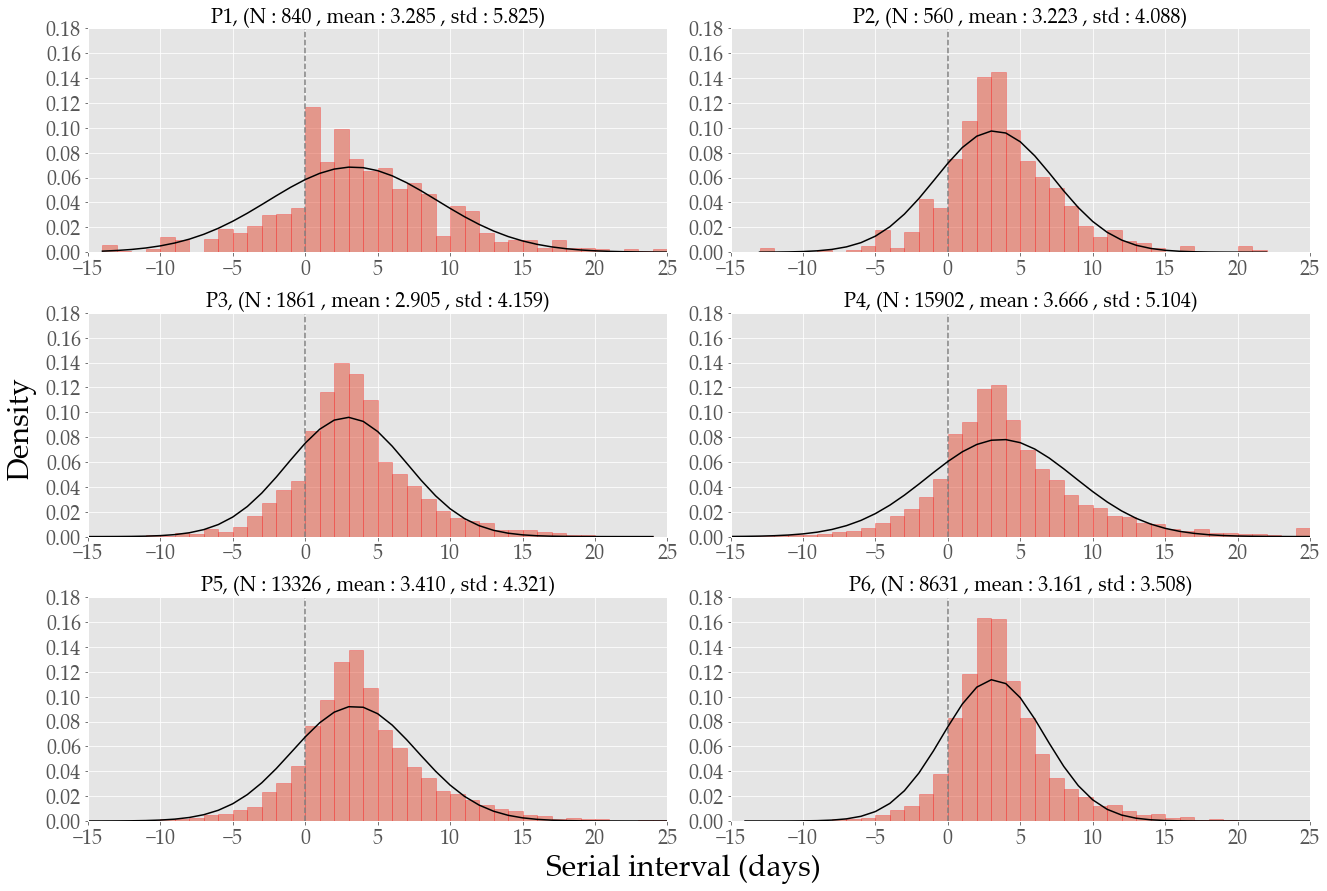

In [5]:
plt.rcParams["font.family"] = "Palatino Linotype"
fig, ax = plt.subplots(3,2, figsize=(18,12))

target_date = ['2020-01-19', '2020-04-30', '2020-07-15', '2020-10-13', '2021-02-26', '2021-07-12','2021-09-16']
frac = [0.1,0.2,0.1,0.01,0.01,0.01]
# target_date = ['2020-01-19', '2021-09-16']
# frac = [1]*6
style.use('ggplot')
S_interval = []
for i in range(len(target_date)):
    target_date[i] = datetime.strptime(target_date[i], "%Y-%m-%d").date()

for i in range(len(target_date) - 1):
    Net_df_1 = Net_df.loc[:][(Net_df.loc[:,'inf_time'] >= target_date[i]) & (Net_df.loc[:,'inf_time'] < target_date[i + 1])]

    for i2 in Net_df_1.index:
        if len(Net_df_1.loc[i2, 'Onset_date']) != 1:
            Net_df_1.loc[i2, 'Onset_date'] = datetime.strptime(Net_df_1.loc[i2, 'Onset_date'][0:10], "%Y-%m-%d").date()

    Net_df_Onset_0 = Net_df_1.loc[:][Net_df_1.loc[:, 'Onset_date'] == '0'].index
    Net_df2 = Net_df_1.drop(Net_df_Onset_0)
    


    Net_df_2 = Net_df_1.sample(frac=frac[i]).copy()



    S_interval.append([])
    for i2 in Net_df2.index:
        # df_2는 선행확진자의 증상일
        df_2 = Net_df2.loc[:,'Onset_date'][Net_df2.loc[:,'Primary_id'] == Net_df2.loc[i2,'id']] 
        
        for j2 in df_2.index:
            diff_days = df_2[j2] - Net_df2.loc[i2,'Onset_date']
            # print(j)
            # print(diff_days)
            S_interval[i].append(diff_days.days)
            
# for i in range(5):  
    data = S_interval[i].copy()
    ct = 0
    for i2 in range(len(S_interval[i])):
        if (S_interval[i][i2] > 25) | (S_interval[i][i2] <-15):
            data.remove(S_interval[i][i2])
            ct += 1
    print('Number of  Data : ' + str(len(S_interval[i])))
    print('Number of  Filtering Data : ' + str(ct))
    bins_list = [39, 35, 39, 40, 40, 39]
    
    if i < 2:
        
        # plt.figure(i,(9,4))
        _, bins, _ = ax[0,i].hist(data, bins_list[i], density=1, alpha=0.5, edgecolor='red')
        # print(bins)
        # print(len(Counter(data).keys()))
      
        mu, sigma = scipy.stats.norm.fit(data)
        best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
        ax[0,i].set_title('P' + str(i+1) + ', (N : {0:.0f} , mean : {1:.3f} , std : {2:.3f})'.format(len(data),mu,sigma), fontsize = 20)
        ax[0,i].set_xlim([-15,25])
        # plt.ylabel('Density')
        # ax.set_xlabel('Serial interval(days)')
        ax[0,i].axvline(x=0, color='Grey', linestyle='--')
        ax[0,i].plot(bins, best_fit_line, 'k-')
        ax[0,i].set_ylim([0, 0.18])
        for tick in ax[0,i].yaxis.get_majorticklabels():  # example for yaxis
            tick.set_fontsize(20)
        for tick in ax[0,i].xaxis.get_majorticklabels():  # example for yaxis
            tick.set_fontsize(20) 
        # plt.tight_layout()
        
    elif (i < 4) & (2 <= i):
        
        # plt.figure(i,(9,4))
        _, bins, _ = ax[1,i-2].hist(data, bins_list[i], density=1, alpha=0.5, edgecolor='red')
        # print(bins)
        # print(len(Counter(data).keys()))
        
        mu, sigma = scipy.stats.norm.fit(data)
        best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
        ax[1,i-2].set_title('P' + str(i+1) + ', (N : {0:.0f} , mean : {1:.3f} , std : {2:.3f})'.format(len(data),mu,sigma), fontsize = 20)
        ax[1,i-2].set_xlim([-15,25])
        # plt.ylabel('Density')
        # ax.set_xlabel('Serial interval(days)')
        ax[1,i-2].axvline(x=0, color='Grey', linestyle='--')
        ax[1,i-2].plot(bins, best_fit_line, 'k-')
        ax[1,i-2].set_ylim([0, 0.18])
        for tick in ax[1,i-2].yaxis.get_majorticklabels():  # example for yaxis
            tick.set_fontsize(20)
        for tick in ax[1,i-2].xaxis.get_majorticklabels():  # example for yaxis
            tick.set_fontsize(20) 
        # plt.tight_layout()
        
        
    elif i >=4:
        
        # plt.figure(i,(9,4))
        _, bins, _ = ax[2,i-4].hist(data, bins_list[i], density=1, alpha=0.5, edgecolor='red')
        # print(bins)
        # print(len(Counter(data).keys()))
        
        mu, sigma = scipy.stats.norm.fit(data)
        best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
        ax[2,i-4].set_title('P' + str(i+1) + ', (N : {0:.0f} , mean : {1:.3f} , std : {2:.3f})'.format(len(data),mu,sigma), fontsize = 20)
        ax[2,i-4].set_xlim([-15,25])
        # plt.ylabel('Density')
        # ax.set_xlabel('Serial interval(days)')
        ax[2,i-4].axvline(x=0, color='Grey', linestyle='--')
        ax[2,i-4].plot(bins, best_fit_line, 'k-')
        ax[2,i-4].set_ylim([0, 0.18])
        for tick in ax[2,i-4].yaxis.get_majorticklabels():  # example for yaxis
            tick.set_fontsize(20)
        for tick in ax[2,i-4].xaxis.get_majorticklabels():  # example for yaxis
            tick.set_fontsize(20) 
        # plt.tight_layout()
        
        
fig.text(0.5, -0.01, 'Serial interval (days)', va='center', ha='center', fontsize=30)
fig.text(-0.01, 0.5, 'Density', va='center', ha='center', rotation='vertical', fontsize = 30)
fig.tight_layout()
fig.savefig('Total Period Serial Interval', bbox_inches='tight')
